In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("Housing.csv")

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.shape

(545, 13)

In [5]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

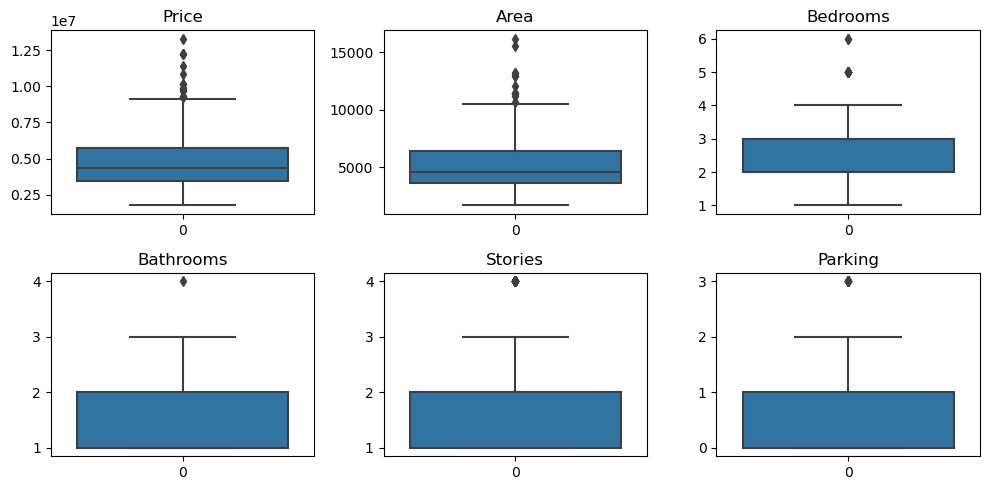

In [9]:
#Outlier analysis
fig, axs = plt.subplots(2,3, figsize =(10,5))
plt1 = sns.boxplot(housing['price'],ax =axs[0,0])
plt1.set_title('Price')
plt2 = sns.boxplot(housing['area'],ax =axs[0,1])
plt2.set_title('Area')
plt3 = sns.boxplot(housing['bedrooms'],ax =axs[0,2])
plt3.set_title('Bedrooms')
plt4 = sns.boxplot(housing['bathrooms'],ax =axs[1,0])
plt4.set_title('Bathrooms')
plt5 = sns.boxplot(housing['stories'],ax =axs[1,1])
plt5.set_title('Stories')
plt6 = sns.boxplot(housing['parking'],ax =axs[1,2])
plt6.set_title('Parking')

plt.tight_layout()
plt.show()

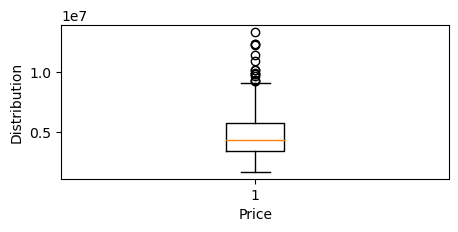

In [10]:
## Outlier Treatmen for Price 
plt.figure(figsize=(5,2))
plt.boxplot(housing['price'])
plt.ylabel('Distribution')
plt.xlabel('Price')
plt.show()

Q1 = housing['price'].quantile(0.25)
Q3 = housing['price'].quantile(0.75)
IQR = Q3 - Q1

housing = housing[(housing['price'] >= Q1 -1.5 * IQR) & (housing['price']<= Q3 + 1.5*IQR)]

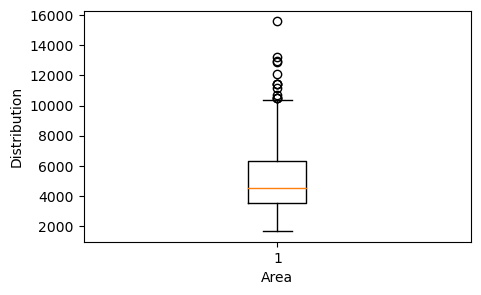

In [11]:
## Outlier Treatment for Area
plt.figure(figsize =(5,3))
plt.boxplot(housing['area'])
plt.xlabel('Area')
plt.ylabel('Distribution')
plt.show()

Q1 = housing['area'].quantile(0.25)
Q3 = housing['area'].quantile(0.75)
IQR = Q3 -Q1

housing = housing[(housing['area'] >= Q1 -1.5*IQR)  & (housing['area'] <= Q3 - 1.5* IQR)]

<strong>Exploratory Data Analysis </strong> 

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


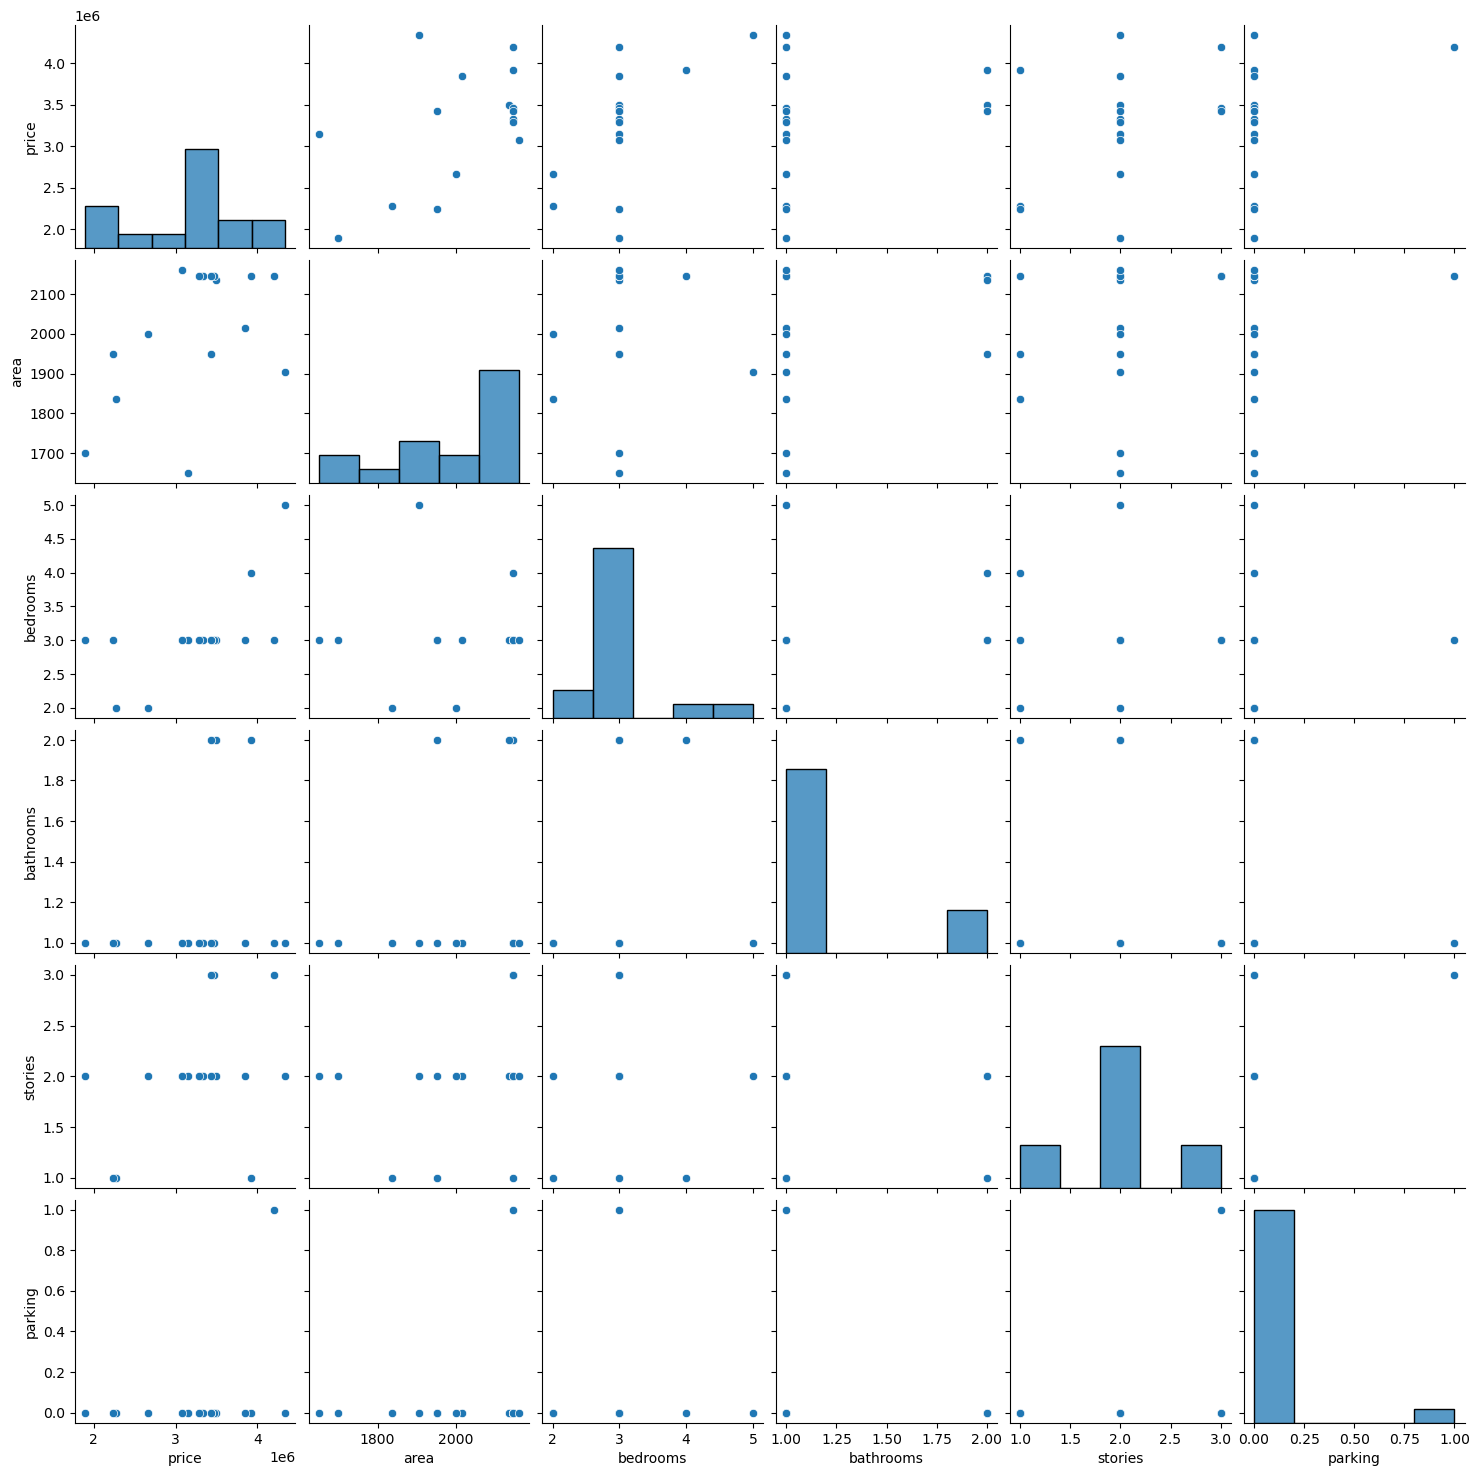

In [12]:
# Let's Understand the data

sns.pairplot(housing)
plt.show()

<strong> Data Preparation </strong>
Ther are lot of variables in the dataset which are categorical maily with values as 'yes' or 'no'
but in order to fit a regression line we need to convert them to 1s and 0s where 1 is yes and 0 is no 

In [13]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
302,4200000,2145,3,1,3,yes,no,no,no,no,1,yes,unfurnished
337,3920000,2145,4,2,1,yes,no,yes,no,no,0,yes,unfurnished
345,3850000,2015,3,1,2,yes,no,yes,no,no,0,yes,semi-furnished
390,3500000,2135,3,2,2,no,no,no,no,no,0,no,unfurnished


In [14]:
def binary_map(x):
    if x in ['yes', 'no']:
     return 1 if x=='yes' else 0
    return x

housing = housing.applymap(binary_map)

In [15]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
271,4340000,1905,5,1,2,0,0,1,0,0,0,0,semi-furnished
302,4200000,2145,3,1,3,1,0,0,0,0,1,1,unfurnished
337,3920000,2145,4,2,1,1,0,1,0,0,0,1,unfurnished
345,3850000,2015,3,1,2,1,0,1,0,0,0,1,semi-furnished
390,3500000,2135,3,2,2,0,0,0,0,0,0,0,unfurnished


In [16]:
status = pd.get_dummies(housing['furnishingstatus'])


In [17]:
status.head()

,furnished,semi-furnished,unfurnished
271,False,True,False
302,False,False,True
337,False,False,True
345,False,True,False
390,False,False,True


In [18]:
def status_map(x):
    if x in [True, False]:
        return 0 if x == True else 1
    return x

status = status.applymap(status_map)


In [19]:
status.head()

,furnished,semi-furnished,unfurnished
271,1,0,1
302,1,1,0
337,1,1,0
345,1,0,1
390,1,1,0


In [20]:
#Let's Drop the first columns from status using drop_first = True
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)


In [21]:
#Add the results to original housing dataframe 
housing = pd.concat([housing, status], axis =1)

In [24]:
housing['furnishingstatus']

271    semi-furnished
302       unfurnished
337       unfurnished
345    semi-furnished
390       unfurnished
407         furnished
411         furnished
413       unfurnished
427         furnished
436         furnished
449       unfurnished
462    semi-furnished
498    semi-furnished
527    semi-furnished
530       unfurnished
537       unfurnished
Name: furnishingstatus, dtype: object

In [25]:
housing.drop(['furnishingstatus'],axis=1, inplace =True)

In [26]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
271,4340000,1905,5,1,2,0,0,1,0,0,0,0,True,False
302,4200000,2145,3,1,3,1,0,0,0,0,1,1,False,True
337,3920000,2145,4,2,1,1,0,1,0,0,0,1,False,True
345,3850000,2015,3,1,2,1,0,1,0,0,0,1,True,False
390,3500000,2135,3,2,2,0,0,0,0,0,0,0,False,True
407,3465000,2145,3,1,3,1,0,0,0,0,0,1,False,False
411,3430000,2145,3,1,3,1,0,0,0,0,0,1,False,False
413,3430000,1950,3,2,2,1,0,1,0,0,0,1,False,True
427,3332000,2145,3,1,2,1,0,1,0,0,0,1,False,False
436,3290000,2145,3,1,2,1,0,1,0,0,0,1,False,False


In [27]:
def final_map(x):
    if x in [True, False]:
        return 1 if x== True else 0
    return x
housing = housing.applymap(final_map)

In [28]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
271,4340000,1905,5,1,2,0,0,1,0,0,0,0,1,0
302,4200000,2145,3,1,3,1,0,0,0,0,1,1,0,1
337,3920000,2145,4,2,1,1,0,1,0,0,0,1,0,1
345,3850000,2015,3,1,2,1,0,1,0,0,0,1,1,0
390,3500000,2135,3,2,2,0,0,0,0,0,0,0,0,1


In [34]:
## Splitting the data into training tests and testing tests

from sklearn.model_selection import train_test_split

#we specify this so that train and test data sets alwasy have the same rows, respectively

np.random.seed(0)
housing_train, housing_test = train_test_split(housing, train_size=0.7, test_size =0.3, random_state=100)

In [35]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
271,4340000,1905,5,1,2,0,0,1,0,0,0,0,1,0
302,4200000,2145,3,1,3,1,0,0,0,0,1,1,0,1
337,3920000,2145,4,2,1,1,0,1,0,0,0,1,0,1
345,3850000,2015,3,1,2,1,0,1,0,0,0,1,1,0
390,3500000,2135,3,2,2,0,0,0,0,0,0,0,0,1


Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [36]:
from sklearn.preprocessing import MinMaxScaler


In [37]:
scaler = MinMaxScaler()

In [38]:
#Apply scaler() to all the numeric columns except the 'yes-no' and 'dummy-variables'
num_vars =['price','area','bedrooms','stories','parking','bathrooms']
housing_train[num_vars]=scaler.fit_transform(housing_train[num_vars])

In [39]:
housing_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
411,0.628571,1.000000,0.333333,0.0,1.0,1,0,0,0,0,0.0,1,0,0
530,0.142857,0.561798,0.333333,0.0,0.0,0,0,0,1,0,0.0,0,0,1
407,0.642857,1.000000,0.333333,0.0,1.0,1,0,0,0,0,0.0,1,0,0
337,0.828571,1.000000,0.666667,1.0,0.0,1,0,1,0,0,0.0,1,0,1
390,0.657143,0.977528,0.333333,1.0,0.5,0,0,0,0,0,0.0,0,0,1


In [47]:
housing_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.0,11.000000,11.000000,11.000000
mean,0.566494,0.722165,0.393939,0.272727,0.500000,0.727273,0.0,0.454545,0.090909,0.0,0.0,0.545455,0.272727,0.454545
std,0.299562,0.319033,0.250252,0.467099,0.316228,0.467099,0.0,0.522233,0.301511,0.0,0.0,0.522233,0.467099,0.522233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,0.451429,0.561798,0.333333,0.000000,0.500000,0.500000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,0.628571,0.707865,0.333333,0.000000,0.500000,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000
75%,0.728571,1.000000,0.333333,0.500000,0.500000,1.000000,0.0,1.000000,0.000000,0.0,0.0,1.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000


In [48]:
corr =housing_train.corr()

In [49]:
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.526373,0.614188,0.296448,0.158345,-0.071838,NaN,0.647686,-0.469033,NaN,NaN,0.459075,0.296448,-0.367758
area,0.526373,1.000000,-0.082307,0.250187,0.217174,0.111727,NaN,0.071730,-0.166716,NaN,NaN,0.562194,-0.217286,-0.305927
bedrooms,0.614188,-0.082307,1.000000,0.129619,-0.210606,-0.414781,NaN,0.533300,-0.080322,NaN,NaN,-0.023187,0.129619,0.023187
bathrooms,0.296448,0.250187,0.129619,1.000000,-0.338502,-0.083333,NaN,0.260875,-0.193649,NaN,NaN,0.149071,-0.375000,0.670820
stories,0.158345,0.217174,-0.210606,-0.338502,1.000000,0.338502,NaN,-0.302765,-0.524404,NaN,NaN,0.302765,0.000000,-0.605530
mainroad,-0.071838,0.111727,-0.414781,-0.083333,0.338502,1.000000,NaN,0.149071,-0.516398,NaN,NaN,0.670820,-0.083333,-0.260875
guestroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,0.647686,0.071730,0.533300,0.260875,-0.302765,0.149071,NaN,1.000000,-0.288675,NaN,NaN,0.466667,0.260875,-0.100000
hotwaterheating,-0.469033,-0.166716,-0.080322,-0.193649,-0.524404,-0.516398,NaN,-0.288675,1.000000,NaN,NaN,-0.346410,-0.193649,0.346410
airconditioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


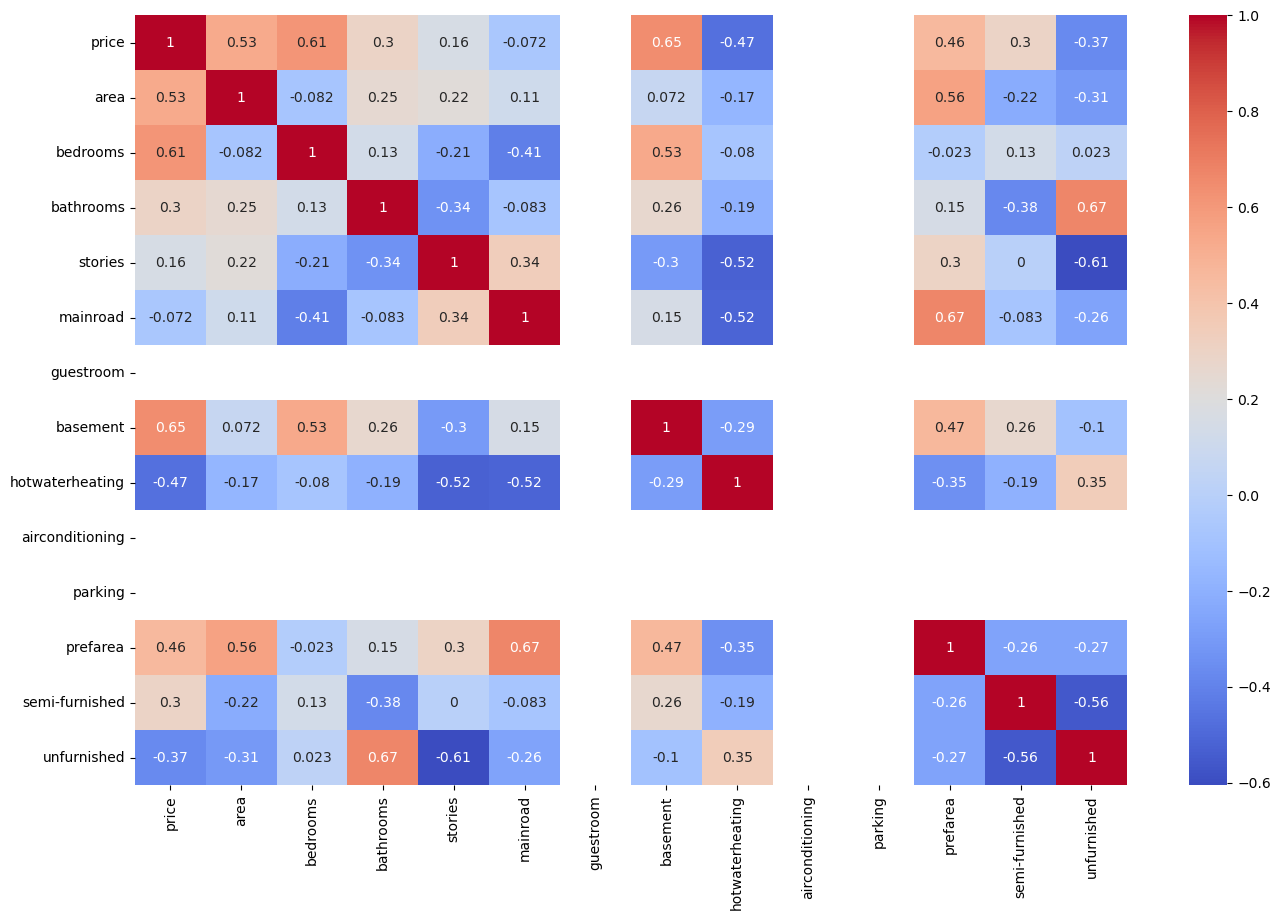

In [50]:
###Let's Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(16,10))
sns.heatmap(housing_train.corr(), annot= True, cmap= 'coolwarm' )
plt.show()

It is clearly visible that area and price have very strong correlation 

Dividing into x and y sets for model building

In [51]:
y_train = housing_train.pop('price') #This is used to seperate price column from the dataset it typically represents the value which you want to predict or target variable commonly used 
x_train = housing_train 


<strong>Model Building </strong>

this time we would be using the Linear Regression function from scikit learn for its compatibility with RFE (which is a utility from sklearn )


In [52]:
#Recursive Feature Elimination
#Importing RFE and Linear Regression 

from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 

In [53]:
#Running RFE with the output number of variables equal to 10 

lm = LinearRegression()
lm.fit(x_train,y_train )

LinearRegression()

In [69]:
rfe = RFE(estimator=lm,n_features_to_select=6)
 #line of code initializes RFE to use a linear regression model (lm) and selects 6 features through the feature elimination process.

In [74]:
rfe.fit(x_train, y_train)
selected_features = x_train.columns[rfe.support_]

In [75]:
selected_features

Index(['area', 'bedrooms', 'mainroad', 'hotwaterheating', 'prefarea',
       'semi-furnished'],
      dtype='object')

In [76]:
##Building Model using a statsmodel for the detailes statistics 

In [78]:
#Creating x_test_dataframe with RFE selected variables 
x_train_rfe = x_train[selected_features]

In [79]:
x_train_rfe

,area,bedrooms,mainroad,hotwaterheating,prefarea,semi-furnished
411,1.000000,0.333333,1,0,1,0
530,0.561798,0.333333,0,1,0,0
407,1.000000,0.333333,1,0,1,0
337,1.000000,0.666667,1,0,1,0
390,0.977528,0.333333,0,0,0,0
271,0.460674,1.000000,0,0,0,1
498,0.674157,0.000000,1,0,0,1
413,0.561798,0.333333,1,0,1,0
345,0.707865,0.333333,1,0,1,1
537,0.000000,0.333333,1,0,0,0


In [81]:
import statsmodels.api as sm 
lm= sm.OLS(y_train, x_train_rfe).fit()

In [82]:
lm.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              110.5
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                    3.78e-05
Time:                        00:45:07   Log-Likelihood:                          16.319
No. Observations:                  11   AIC:                                     -20.64
Df Residuals:                       5   BIC:                                     -18.25
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area                0.3965      0.076      5.244      0.003       0.202       0.591
bedrooms            0.5900      0.090      6.560      0.001       0.359       0.821
mainroad           -0.1956      0.065     -2.997      0.030      -0.363      -0.028
hotwaterheating    -0.2766      0.091     -3.045      0.029      -0.510      -0.043
prefarea            0.2638      0.082      3.225      0.023       0.054       0.474
semi-furnished      0.2414      0.060      4.005      0.010       0.086       0.396
==============================================================================
Omnibus:                        7.577   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                3.297
Skew:                           1.227   Prob(JB):                        0.192
Kurtosis:                       4.082   Cond. No.                         6.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
###Calculate the VIFs for the model 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
vif = pd.DataFrame()
x =x_train_rfe
vif['features'] =x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,features,VIF
4,prefarea,6.06
0,area,5.83
2,mainroad,5.14
1,bedrooms,2.85
5,semi-furnished,1.65
3,hotwaterheating,1.24


In [89]:
y_train_price = lm.predict(x_train_rfe)
res = (y_train_price - y_train)

In [90]:
res

411    3.286552e-02
530   -1.110223e-16
407    1.857980e-02
337    2.953327e-02
390   -7.289411e-02
271    1.408181e-02
498   -1.115395e-03
413   -1.408777e-01
345   -1.296642e-02
537    1.115395e-03
427    7.286552e-02
dtype: float64

In [91]:
###Imortingthe required libraries for plots 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

C:\Users\DELL\AppData\Local\Temp\ipykernel_8624\2878855919.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train -y_train_price), bins =20 )


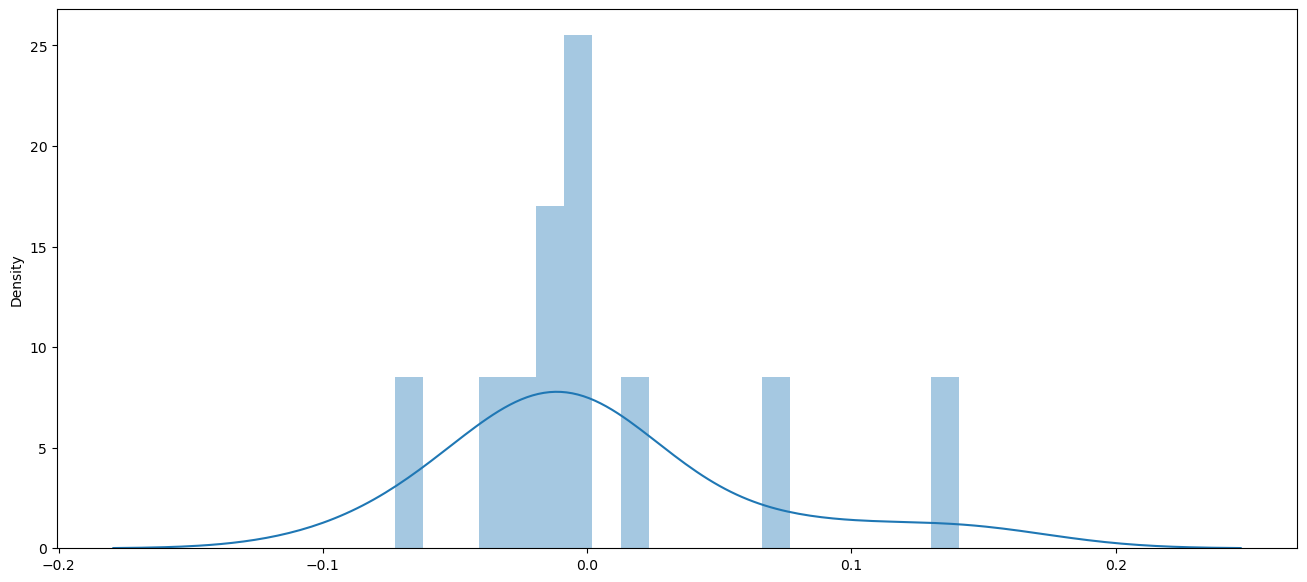

In [94]:
##Plotting the histogram for the error terms 
fig = plt.figure(figsize =(16,7))
sns.distplot((y_train -y_train_price), bins =20 )
plt.show()

In [95]:
# Assuming lm is your fitted OLS regression model
intercept = lm.params[0]
coefficients = lm.params[1:]

# Construct the equation of the best-fitted line
equation = f'y = {intercept:.2f}'
for i, coef in enumerate(coefficients):
    equation += f' + {coef:.2f} * x{i+1}'

print("Equation of the best-fitted line:")
print(equation)


Equation of the best-fitted line:
y = 0.40 + 0.59 * x1 + -0.20 * x2 + -0.28 * x3 + 0.26 * x4 + 0.24 * x5
